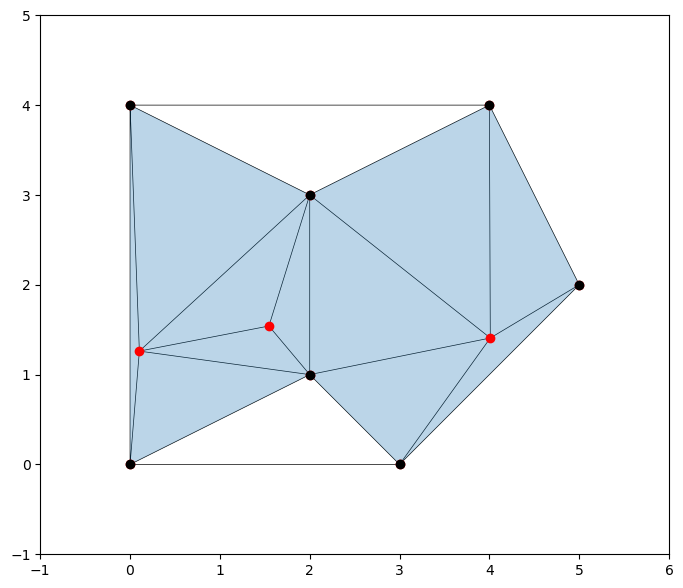

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
from shapely.geometry import Point, Polygon
from shapely.geometry.polygon import LinearRing
import random

# Function to check if a point is inside a polygon
def is_point_in_polygon(point, polygon):
    return polygon.contains(point)

# Create a complex shape using Shapely
boundary_points = [
    (0, 0), (2, 1), (3, 0), (5, 2), (4, 4), (2, 3), (0, 4)
]
polygon = Polygon(boundary_points)

# Generate random points inside the shape
num_points = 3
points = []
while len(points) < num_points:
    random_point = Point(random.uniform(0, 5), random.uniform(0, 4))
    if is_point_in_polygon(random_point, polygon):
        points.append([random_point.x, random_point.y])

points = np.array(points + boundary_points)
boundary_points = np.array(boundary_points)
# Create Delaunay triangulation
tri = Delaunay(points)

# Plot the triangulated shape
plt.figure(figsize=(10, 7))
plt.triplot(points[:, 0], points[:, 1], tri.simplices, color='k', lw=0.5)
plt.plot(points[:, 0], points[:, 1], 'o', color='red')
plt.plot(boundary_points[:, 0], boundary_points[:, 1], 'o', color='black')

plt.fill(*polygon.exterior.xy, alpha=0.3)
plt.xlim(-1, 6)
plt.ylim(-1, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
